In [1]:
# Holy grail
import pandas as pd 
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Scikit-learn
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
#from keras.utils.vis_utils import plot_model

# machine Learning
from sklearn.linear_model import LinearRegression

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Working directory
import os
wd="C:/Users/swati/Desktop/Anaconda/"
os.chdir(wd)

### 1. Load the data 

In [2]:
data = pd.read_csv('Housing.csv')
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
data.shape

(545, 13)

In [5]:
data.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [6]:
num_col = ['price','area']

cat_col = ['bedrooms','bathrooms','stories','mainroad','guestroom','basement',
           'hotwaterheating','airconditioning','parking','prefarea','furnishingstatus']


### 2. EDA and plots

bedrooms
3    300
2    136
4     95
5     10
6      2
1      2
Name: count, dtype: int64

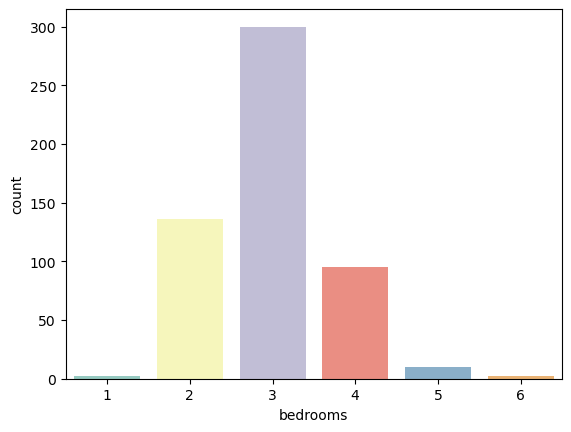

In [7]:
sns.countplot(x='bedrooms', data=data, palette='Set3')

data['bedrooms'].value_counts()

bathrooms
1    401
2    133
3     10
4      1
Name: count, dtype: int64

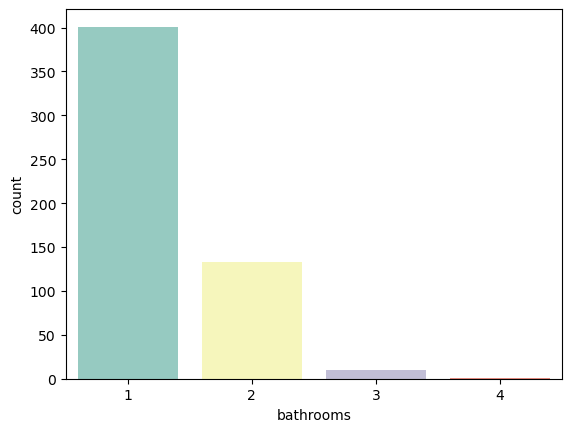

In [8]:
sns.countplot(x='bathrooms', data=data, palette='Set3')

data['bathrooms'].value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

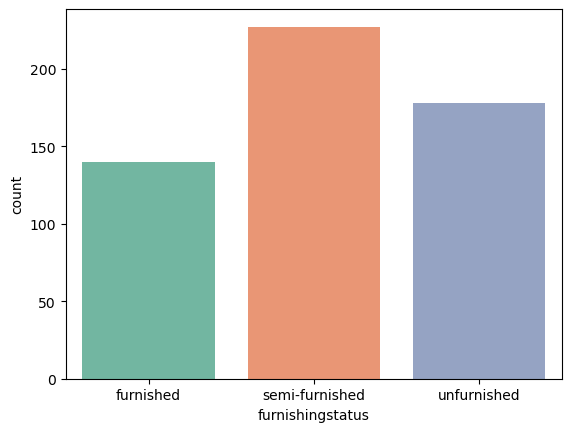

In [9]:
sns.countplot(x='furnishingstatus', data=data, palette='Set2')

data['furnishingstatus'].value_counts()

In [10]:
data[['bedrooms','furnishingstatus']].groupby(['furnishingstatus']).agg(['mean','median','min','max','count'])

bedrooms                     
                      mean median min max count
furnishingstatus                               
furnished         3.064286    3.0   1   6   140
semi-furnished    3.008811    3.0   2   5   227
unfurnished       2.831461    3.0   1   6   178

<Axes: xlabel='price', ylabel='Count'>

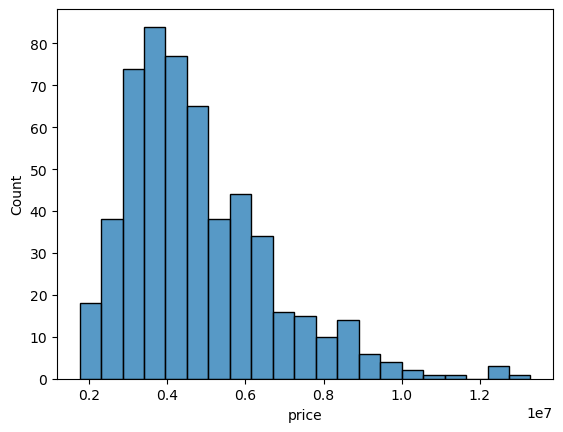

In [11]:
sns.histplot(data['price'])

<Axes: xlabel='area', ylabel='Density'>

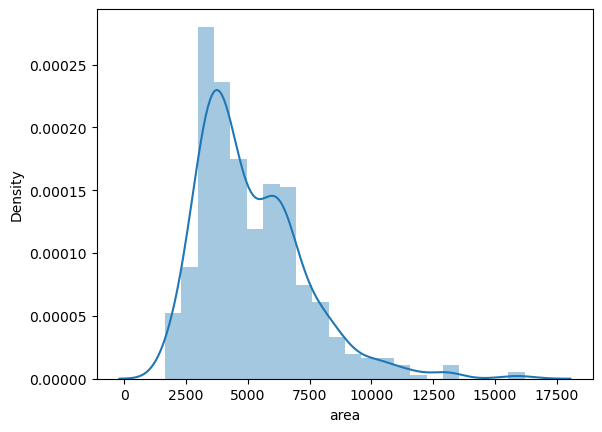

In [12]:
sns.distplot(data['area'])

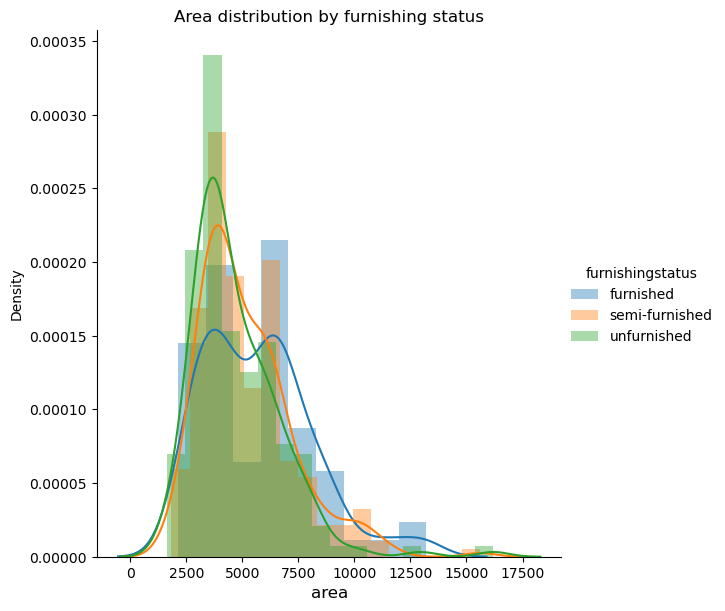

In [13]:
g = sns.FacetGrid(data, hue='furnishingstatus', height = 6)
g.map(sns.distplot, 'area')
g.set_xlabels('area', fontsize=12)
plt.title('Area distribution by furnishing status')
g.add_legend()

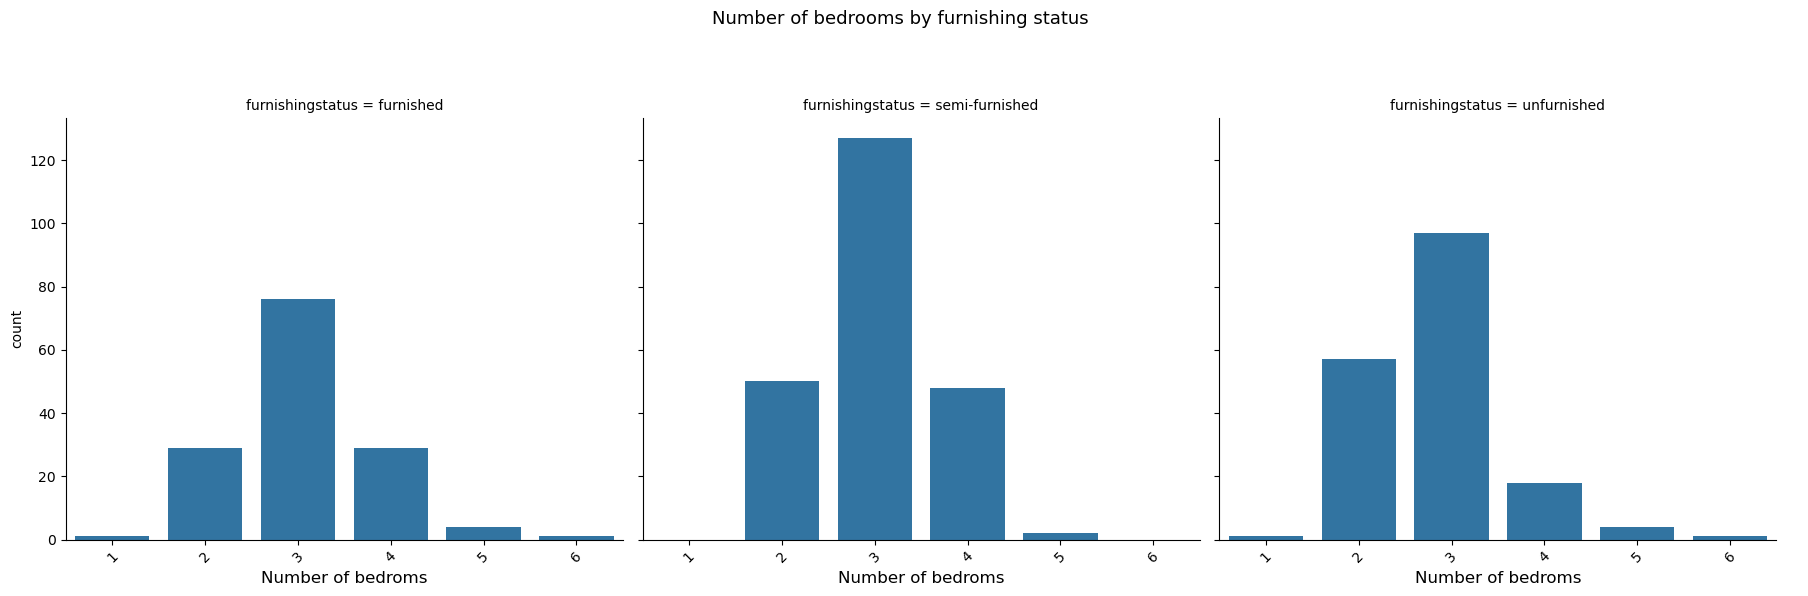

In [14]:
g = sns.FacetGrid(data, col='furnishingstatus', height = 6)
g.map(sns.countplot, 'bedrooms')
g.set_xlabels('Number of bedroms', fontsize=12)
g.set_xticklabels(rotation=45)
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Number of bedrooms by furnishing status', fontsize=13)
g.add_legend()

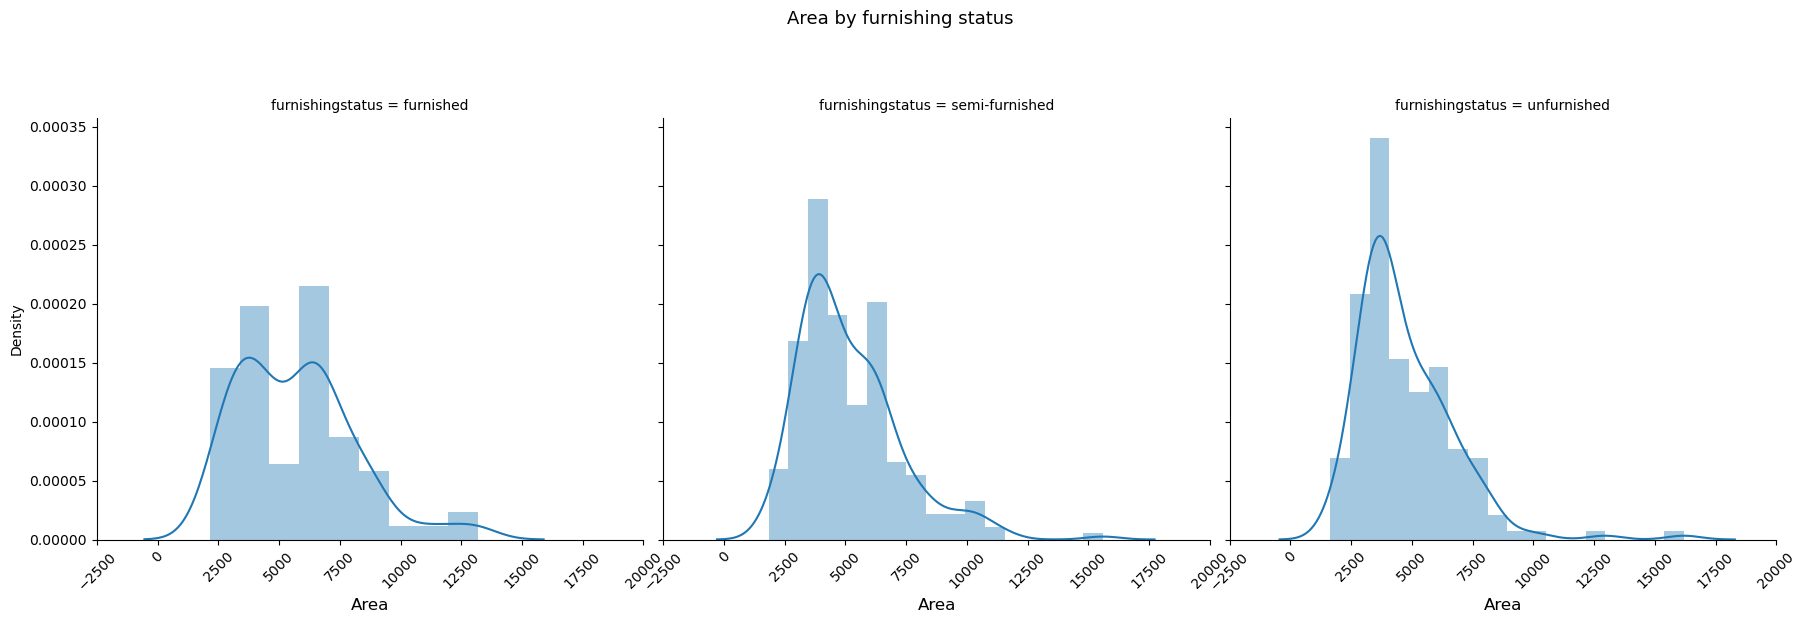

In [15]:
g = sns.FacetGrid(data, col='furnishingstatus', height = 6)
g.map(sns.distplot, 'area')
g.set_xlabels('Area', fontsize=12)
g.set_xticklabels(rotation=45)
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Area by furnishing status', fontsize=13)
g.add_legend()

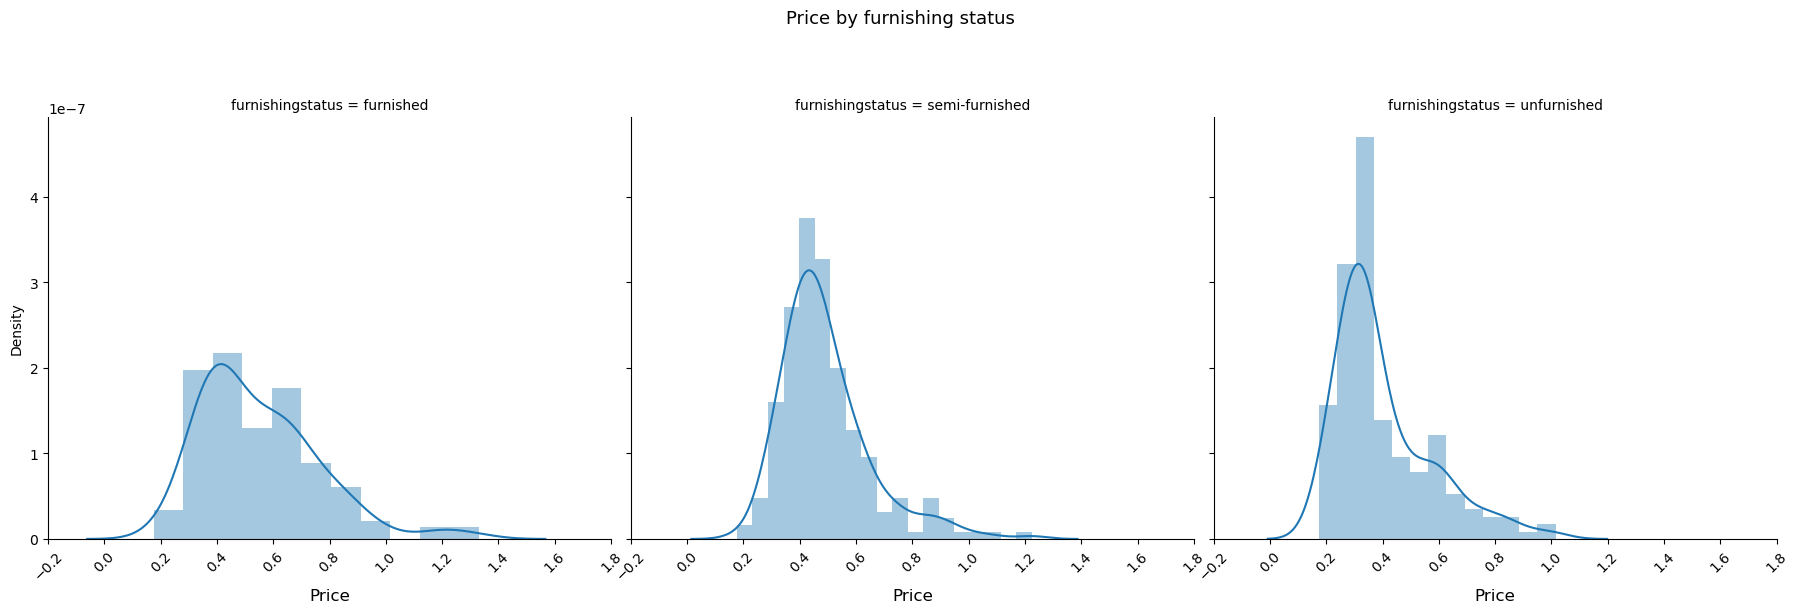

In [16]:
g = sns.FacetGrid(data, col='furnishingstatus', height = 6)
g.map(sns.distplot, 'price')
g.set_xlabels('Price', fontsize=12)
g.set_xticklabels(rotation=45)
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Price by furnishing status', fontsize=13)
g.add_legend()

### 3. Feature engineering

In [17]:
#data.drop(index= data[data.price>10000000].index,inplace=True)

# drop outliers
data.drop(index= data[data['price']>10000000].index,inplace=True)


In [18]:
X = data.drop(columns='price')
y = data['price']/10000000            # divinding the price for normalization


In [19]:
feature_num = X.select_dtypes(exclude='object').columns
feature_cat = X.select_dtypes(include='object').columns

In [20]:
preprocessor = make_column_transformer((MinMaxScaler(),feature_num),
                                       (OneHotEncoder(handle_unknown='ignore'),feature_cat))


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [22]:
X_train.shape

(375, 20)

### 4. Deep learning model 

In [23]:
# Define Model layers
model = keras.Sequential([# Input Layer
                          layers.Dense(units=20, activation='relu', input_dim=X_train.shape[1]),
    
                          # Hidden Layers
                          layers.Dense(500,activation='relu'),   
                          layers.Dense(500,activation='relu'),
                          layers.Dense(500,activation='relu'),
    
                          # Output Layer
                          layers.Dense(1),
                         ])


# optimizer and loss for model
model.compile(optimizer='adam',
              loss='mae',
              metrics=[tf.keras.metrics.RootMeanSquaredError()]
              )


# Early stopper to stop the epochs
early_stoping = keras.callbacks.EarlyStopping(patience=20,
                                              min_delta=0.001,
                                              restore_best_weights=True,
                                             )
          

In [24]:
# fit the model
house_price = model.fit(X_train,y_train,
                      validation_data=(X_test,y_test),  # validation data
                      batch_size = 128,                 # number of inputs for optimizer
                      epochs = 400,                     # number of iteration
                      callbacks=[early_stoping],        # callback to stop iteration when val loss stops decreasing
                      verbose = 0
                      )

In [28]:
history_df = pd.DataFrame(house_price.history)
history_df.head()

,loss,root_mean_squared_error,val_loss,val_root_mean_squared_error
0,0.245690,0.300869,0.116776,0.166348
1,0.114791,0.158540,0.104627,0.134754
2,0.102095,0.127603,0.096255,0.128053
3,0.092888,0.123850,0.100456,0.138122
4,0.083939,0.111287,0.100156,0.125392


Best Validation Loss: 0.0783
Best Validation RMSE: 0.1663


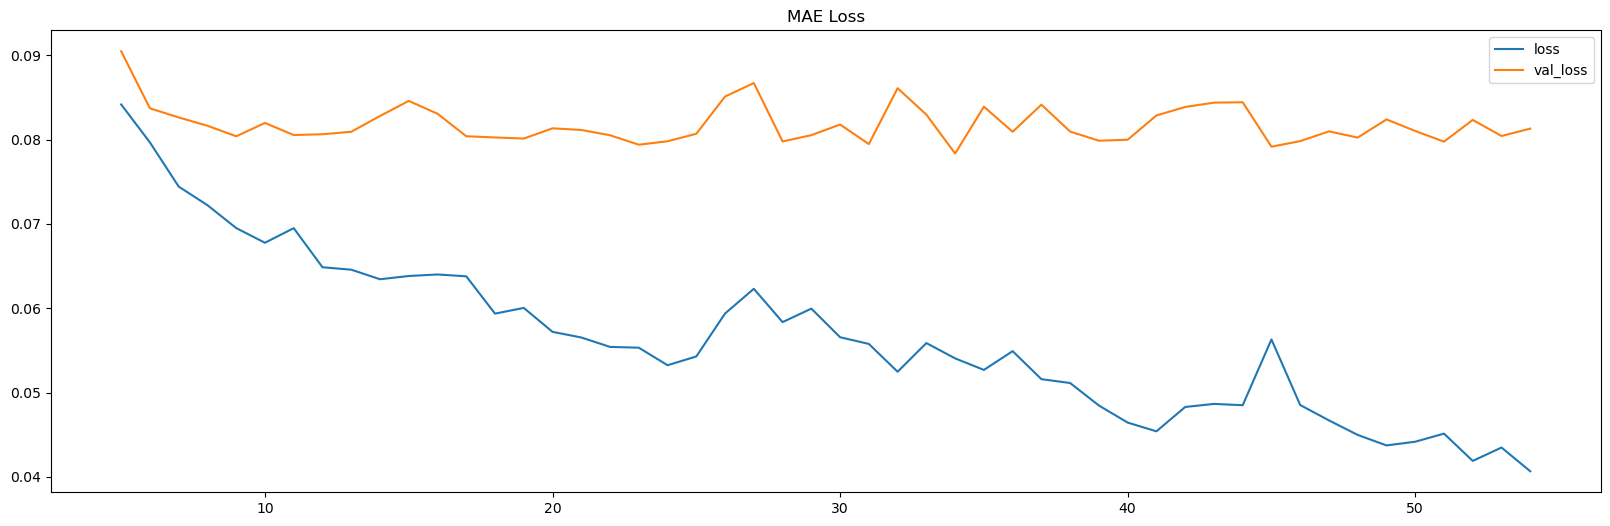

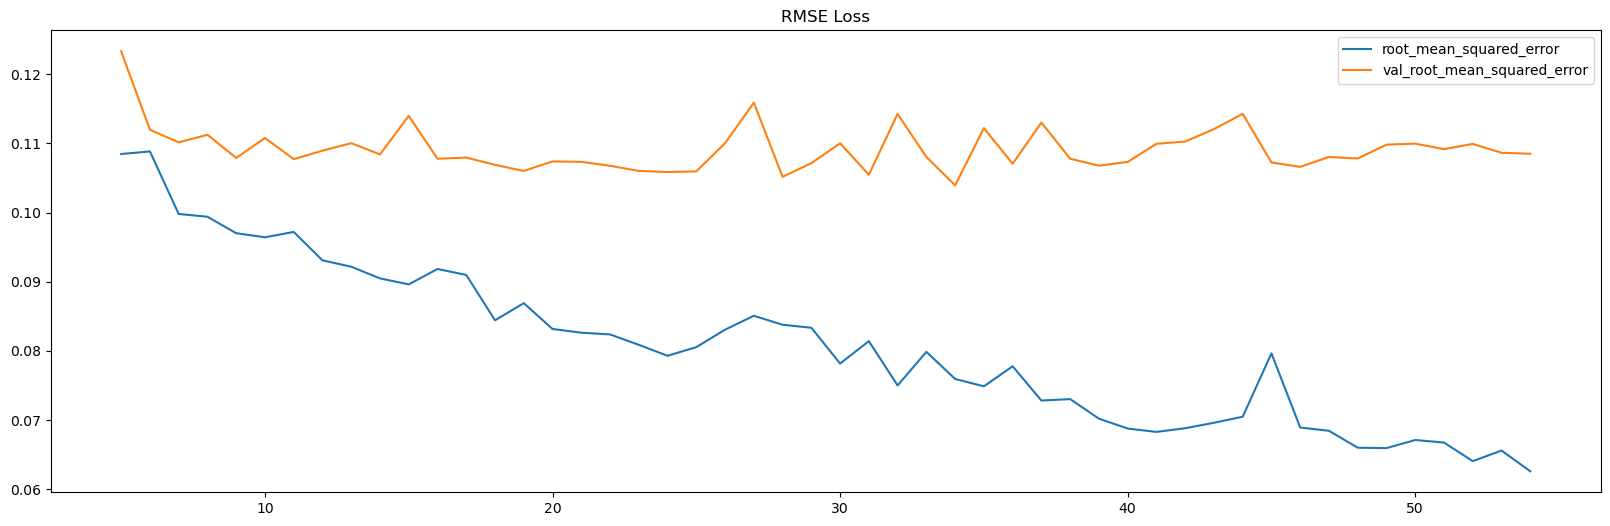

In [31]:
history_df = pd.DataFrame(house_price.history)
# Start the plot at epoch 5
history_df.loc[5:, ['loss', 'val_loss']].plot(title="MAE Loss",figsize=(20,6))
history_df.loc[5:, ['root_mean_squared_error', 'val_root_mean_squared_error']].plot(title="RMSE Loss",figsize=(20,6))

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation RMSE: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_root_mean_squared_error'].max()))

### 6. Prediction

In [32]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

pred_test= model.predict(X_test)
r2_score(y_test,pred_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


0.6674394426011041

In [33]:
pred_train= model.predict(X_train)
r2_score(y_train,pred_train)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


0.8051038397142678

In [34]:
print('RMSE of train data:',np.sqrt(mean_squared_error(y_train,pred_train)))
print('RMSE of test data:',np.sqrt(mean_squared_error(y_test,pred_test))) 


RMSE of train data: 0.0717720065296388
RMSE of test data: 0.10392524226812613


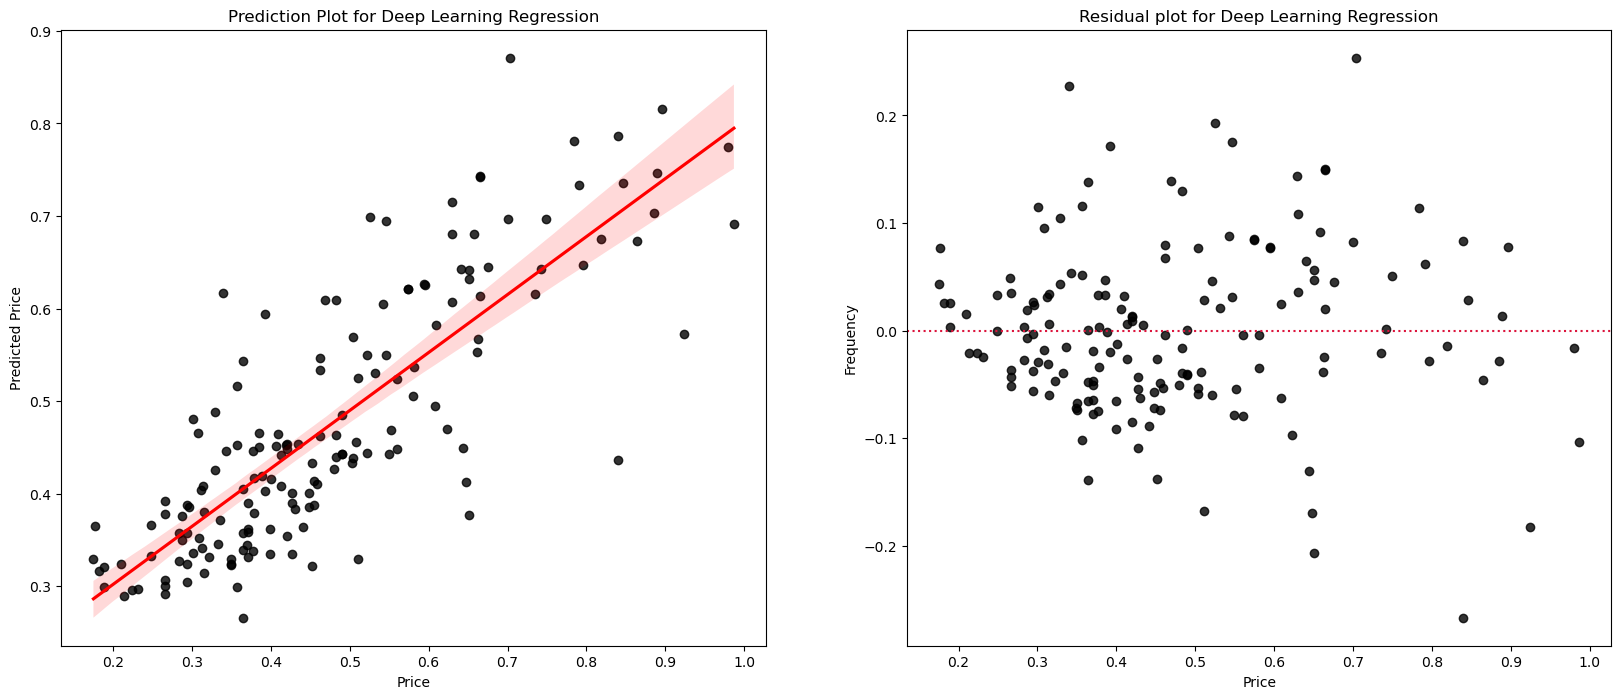

In [36]:
plt.figure(figsize=(20,8))
# Prediction plot
ax1 = plt.subplot(1,2,1)
sns.regplot(data=data,x=y_test,y=pred_test ,scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.title('Prediction Plot for Deep Learning Regression')
plt.xlabel('Price')
plt.ylabel('Predicted Price')
    
#Residual plot   
ax2 = plt.subplot(1,2,2) 
ax=sns.residplot(data= y,x=y_test,y=pred_test,color='black')
ax.lines[0].set_color('crimson')
plt.title('Residual plot for Deep Learning Regression')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.show()